### Pattern: Sliding window，滑动窗口类型
滑动窗口类型的题目经常是用来执行数组或是链表上某个区间（窗口）上的操作。比如找最长的全为1的子数组长度。滑动窗口一般从第一个元素开始，一直往右边一个一个元素挪动。当然了，根据题目要求，我们可能有固定窗口大小的情况，也有窗口的大小变化的情况。


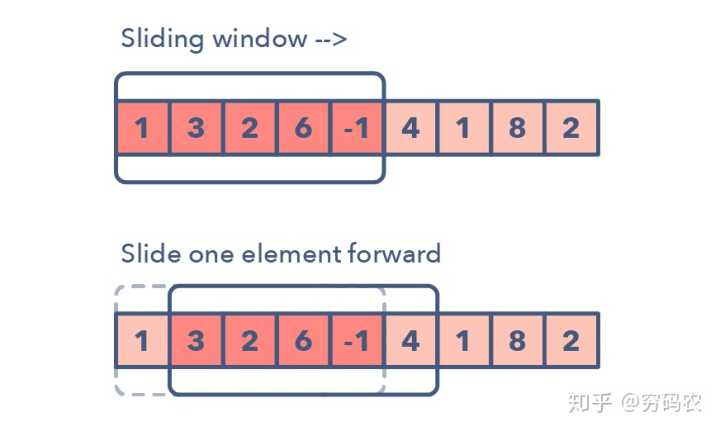

这个问题的输入是一些线性结构：比如链表呀，数组啊，字符串啊之类的
让你去求最长/最短子字符串或是某些特定的长度要求

#### Maximum Sum Subarray of Size K (easy)
Given an array nums and a target value k, find the maximum length of a subarray that sums to k. If there isn't one, return 0 instead.

* Example1

    * Input:  nums = [1, -1, 5, -2, 3], k = 3

    * Output: 4

    * Explanation:
        because the subarray [1, -1, 5, -2] sums to 3 and is the longest.


* Example2
    * Input: nums = [-2, -1, 2, 1], k = 1
    
    * Output: 2
    
    * Explanation:
        because the subarray [-1, 2] sums to 1 and is the longest.

1. 求累计和
2. 用哈希装(累计和 - k) = index
3. loop累计和， 查找累计和 - k的index

In [2]:
def maxSubArrayLen(nums, k):
    largest_len = 0
    sums = 0
    hashdict = dict()
    for idx, num in enumerate(nums):
        sums += num
        nums[idx] = sums  # 累计和
        if sums - k in hashdict:  # 累计和 - k 为key； value为 index
            hashdict[sums - k].append(idx)
        else:
            hashdict[sums - k] = [idx]
        if sums == k:
            largest_len = max(largest_len, idx + 1)

    for idx, num in enumerate(nums):  # 对于每个累计和 找累计和-k的index 然后减一下就是长度
        if num in hashdict:
            for index in hashdict[num]:
                if index > idx:
                    largest_len = max(largest_len, index - idx)
    return largest_len

In [15]:
nums = [-2,-1,2,1]
k = 1
key = 2
assert maxSubArrayLen(nums, k) == key
print('Correct')

Correct


#### Fruit Into Baskets (Medium)
In a row of trees, the i-th tree produces fruit with type tree[i].

You start at any tree of your choice, then repeatedly perform the following steps:

Add one piece of fruit from this tree to your baskets.  If you cannot, stop.
Move to the next tree to the right of the current tree.  If there is no tree to the right, stop.
Note that you do not have any choice after the initial choice of starting tree: you must perform step 1, then step 2, then back to step 1, then step 2, and so on until you stop.

You have two baskets, and each basket can carry any quantity of fruit, but you want each basket to only carry one type of fruit each.

What is the total amount of fruit you can collect with this procedure?

* Example
    * Input: [3,3,3,1,2,1,1,2,3,3,4]
    * Output: 5
    * Explanation: We can collect [1,2,1,1,2].
        If we started at the first tree or the eighth tree, we would only collect 4 fruits.

In [13]:
def totalFruit(tree) -> int:
    if len(tree) <= 2:
        return len(tree)

    point_left = 0
    global_length = 2
    fruits_type = dict()    
    temp_length = 0
    ll_type, l_type = None, None

    for idx in range(len(tree)):  # N
        if len(fruits_type) < 2 or tree[idx] in fruits_type:  # 1
            temp_length += 1                
            global_length = max(temp_length, global_length)
            if tree[idx] != l_type:
                ll_type, l_type = l_type, tree[idx]

        else:
            point_left = fruits_type[ll_type] + 1
            del fruits_type[ll_type]
            temp_length = idx - point_left + 1
            ll_type, l_type = l_type, tree[idx]

        fruits_type[tree[idx]] = idx
    return global_length

In [14]:
tree = [3,3,3,1,2,1,1,2,3,3,4]
assert totalFruit(tree) == 5
print('Correct')

Correct


####  Longest Repeating Character Replacement (Medium)
Given a string s that consists of only uppercase English letters, you can perform at most k operations on that string.

In one operation, you can choose any character of the string and change it to any other uppercase English character.

Find the length of the longest sub-string containing all repeating letters you can get after performing the above operations.

**Input:** s = "AABABBA", k = 1 

**Output:** 4 

**Explanation:** 
Replace the one 'A' in the middle with 'B' and form "AABBBBA". The substring "BBBB" has the longest repeating letters, which is 4.


In [24]:
def characterReplacement(s, k):
        count = {}
        max_count = start = result = 0
        for end in range(len(s)):
            count[s[end]] = count.get(s[end], 0) + 1
            max_count = max(max_count, count[s[end]])
            if end - start + 1 - max_count > k:
                count[s[start]] -= 1
                start += 1
            result = max(result, end - start + 1)
        return result

In [25]:
s = "AABACCBBA"
k = 2
ans = 5
assert characterReplacement(s, k) == ans
print('Correct')

Correct
